<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Komputasi Eksplorasi menggunakan Python
*Oleh Mark Bakker*

Dalam *notebook* kali ini, kita akan belajar mempergunakan regresi linear dari beberapa data dalam dataset balok kayu, dan kita juga akan melakukan penyesuaian kurva untuk dataset hasil observasi tinggi air tanah.

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###Regresi Linear

Kita menggunakan regresi linear untuk mencocokkan garis lurus melalui sebuah dataset. Fungsi `polyfit` mencocokkan derajat polinomial acak melalui sebuah dataset (`polyfit` adalah bagian dari paket `numpy`). Argumen inputnya adalah `x,y,degree`. Ketika derajat polinomialnya adalah 1, kurva tersebut akan sesuai dengan garis lurus dengan persamaan $y=p[0]*x+p[1]$ dan akan mengembalikan nilai array dari parameter-parameter `p`. Seluruh parameter tersebut didapatkan oleh `polyfit` dengan cara meminimalisasi jumlah kuadrat galat/*error* yang terjadi antara data nilai sebenarnya (nilai-$y$) dengan nilai hasil regresi polinomial. Sebagai contoh, perhatikan `xdata` dan `ydata` di bawah ini. Kemiringan dan intersepsi-$y$ dari garis yang paling cocok kemudian dapat dihitung dan garis yang paling bersesuaian dapat digambarkan.

slope yang bersesuaian:  0.971428571429
intersepsi-y yang bersesuaian:  1.2380952381


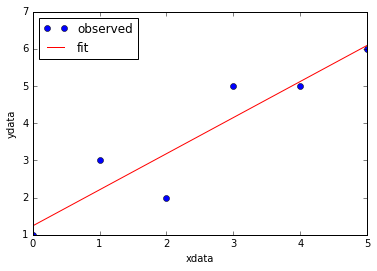

In [16]:
xdata = array([0.0,1.0,2.0,3.0,4.0,5.0])  # Nilai yang diamati dari x
ydata = array([1.0,3.0,2.0,5.0,5.0,6.0])  # Nilai yang diamati dari y
a,b = polyfit(xdata,ydata,1)
print('slope yang bersesuaian: ',a)
print('intersepsi-y yang bersesuaian: ',b)
plot(xdata, ydata, 'bo', label='observed')
yfit = a*xdata + b
error = ydata - yfit  # Error
plot(xdata, yfit, 'r', label='fit')
xlabel('xdata')
ylabel('ydata')
legend(loc='best')

###Latihan 1. Garis regresi lurus yang bersesuaian antara  `Edyn` dan `Estat`

Dataset percobaan balok kayu terdiri dari dua pengukuran modulus elastisitas. Kolom berlabel `Estat` terdiri dari pengukuran modulus elastisitas dengan menggunakan percobaan tekuk statis standar. Kolom berlabel `Edyn` terdiri dari beberapa pengukuran modulus elastisitas dengan menggunakan analisis mekanik dinamis di mana gaya goyangan/osilasi diberikan pada balok. Kedua percobaan ini tidak memberikan hasil yang benar-benar sama. Anda diminta untuk menentukan hubungan linear dari kedua percobaan. Mari kita pertama-tama mengasumsikan bahwa pengukuran `Estat`jauh lebih akurat daripada pengukuran `Edyn` (kita akan mempertimbangkan keadaan sebaliknya di lain waktu).

Plot data `Edyn` pada sumbu-$y$ versus data `Estat`pada sumbu-$x$ dengan menggunakan warna biru. Gunakan `polyfit` untuk menentukan parameter-parameter dari garis lurus yang paling sesuai (*best-fit straight line*) dengan bentuk plot. Tambahkan *best-fit straight line* tersebut sebagai garis merah pada grafik. Berilah label pada sumbu-sumbunya dan tambahkan legenda.

In [17]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)

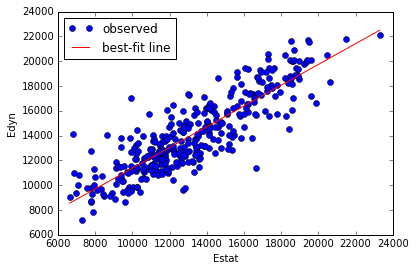

In [18]:
a,b = polyfit(w.Estat,w.Edyn,1)
xfit = linspace(w.Estat.min(),w.Estat.max(),100)
yfit = a * xfit + b
plot(w.Estat,w.Edyn,'bo',label='observed')
plot(xfit,yfit,'r',label='best-fit line')
xlabel('Estat')
ylabel('Edyn')
legend(loc='best')

###Latihan 2. Analisis Galat/*Error* untuk Regresi Linear dari `Edyn` dan `Estat`

Hitunglah perbedaan nilai antara nilai hasil regresi dan nilai hasil observasi (aktual) dari `Edyn`; ini disebut dengan galat atau *error* (jika Anda sudah melakukan regresi atau pencocokan dengan benar, nilai rata-rata galat yang telah dihitung haruslah benar-benar mendekati nol). Buatlah sebuah histogram dari galat yang ada. Tambahkanlah distribusi Normal ke dalam grafik tersebut dengan menggunakan nilai rata-rata dan standar deviasi dari sampel yang baru saja Anda hitung. Pada grafik yang sama, tambahkan juga garis-garis vertikal untuk persentil 2.5 dan 97.5 berdasarkan kondisi distribusi Normal.

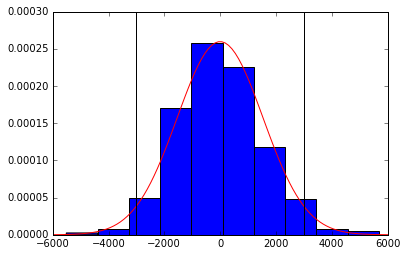

In [19]:
from scipy.stats import norm
error = w.Edyn - (a*w.Estat + b)
mu = mean(error)
sig = std(error)
hist(error,normed=True)
x = linspace(-6000,6000,100)
y = norm.pdf(x,loc=mu,scale=sig)
plot(x,y,'r')
x025 = norm.ppf(0.025,loc=mu,scale=sig)
x975 = norm.ppf(0.975,loc=mu,scale=sig)
axvline(x025,color='k')
axvline(x975,color='k')

Hitunglah berapa banyak poin data yang berada di luar interval 95% berdasarkan distribusi Normal yang bersesuaian dengan grafik tersebut. Poin-poin data di luar interval 95% adalah data-data yang berpotensi sebagai pencilan atau *outlier*, yang berarti poin-poin tersebut berada di luar pola regresi yang ada. Buat ulang plot yang telah Anda buat sebelumnya pada Latihan 3, naun sekarang buatlah plot dengan poin-poin data yang berada dalam interval 95% menggunakan lingkaran berwarna hitam dan poin-poin data di luar interval 95% menggunakan lingkaran berwarna merah (metodenya mengacu pada *Notebook* 4 dari kuarter 1 jika Anda lupa bagaimana cara melakukannya).

jumlah poin di luar persentil-95:  19


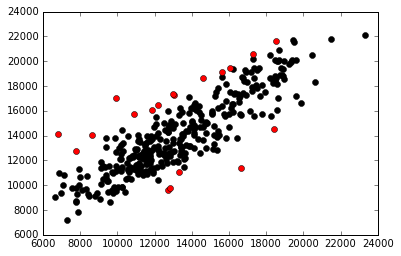

In [20]:
print('jumlah poin di luar persentil-95: ',sum(abs(error)>x975))
outside = abs(error)>x975
plot(w.Estat[~outside],w.Edyn[~outside],'ko')
plot(w.Estat[outside],w.Edyn[outside],'ro')

###Latihan 3. Mencocokkan data percobaan: `Estat` versus `Edyn` atau sebaliknya?

Dalam dua latihan sebelumnya, kita mengasumsikan bahwa `Estat` lebih akurat daripada `Edyn` sehingga kita mencocokkan: `Edyn = a1 * Estat + b1`; mari sebut ini Garis 1. Selanjutnya, kita asumsikan `Edyn` yang lebih akurat daripada `Estat` sehingga kita cocokkan `Estat = a2 * Edyn + b2`; mari kita sebut ini Garis 2. Plot data `Edyn`pada sumbu-$y$ versus data `Estat` pada sumbu-$x$ dengan menggunakan warna biru. Plot dua garis regresi yang setelah Anda hitung terbukti paling bersesuaian (*best-fit lines*) dengan menggunakan garis warna merah (Garis 1) dan hijau (Line 2), berilah label pada sumbu-sumbunya dan tambahkan legenda. Laporkan nilai slope dan intersepsinya dari garis-garis yang paling bersesuaian (*best-fit lines*) saat garis-garis tersebut ditampilkan dalam grafik (Catatan: pelaporan ini membutuhkan sedikit penggunaan aljabar untuk Garis 2 karena diperlukan transformasi persamaan ke dalam bentuk: `Edyn = slope * Estat + intercept`).

a1,b1:  0.836674348143 3010.55026869
a2,b2:  1.11078518985 -625.844196038


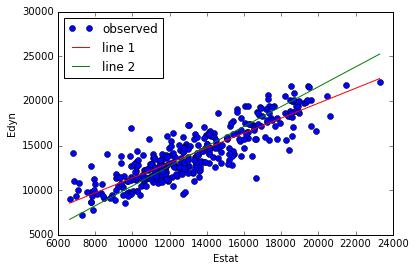

In [12]:
a1,b1 = polyfit(w.Estat,w.Edyn,1)
a2,b2 = polyfit(w.Edyn,w.Estat,1)
print('a1,b1: ',a1,b1)
print('a2,b2: ',1.0/a2,-b2/a2)
plot(w.Estat,w.Edyn,'bo',label='observed')
x1 = array([w.Estat.min(),w.Estat.max()])
y1 = a1*x1 + b1
plot(x1,y1,'r',label='line 1')
y2 = 1.0/a2 * x1 - b2/a2
plot(x1,y2,'g',label='line 2')
xlabel('Estat')
ylabel('Edyn')
legend(loc='best')

###Latihan 4. Analisis galat/*error* untuk `Estat` versus `Edyn` dan sebaliknya

Pada latihan sebelumnya, dua garis lurus hasil regresi telah sesuai untuk bentuk `Edyn = slope * Estat + intercept`. Hitung dan laporkan nilai galat/*error* rata-rata dan nilai akar kuadrat dari rata-rata tersebut untuk kedua garis, di mana galat tersebut didefinisikan sebagai nilai hasil pengukuran `Edyn` dikurangi hasil penyesuaian atau regresi `Edyn`. Plot data galat versus `Estat` unuk kedua garis regresi, masing-masing dengan menggunakan titik-titik merah dan hijau. Apakah salah satu dari grafik galat tersebut memperlihatkan sebuah kecenderungan atau *trend*?

nilai rata-rata galat/error Garis 1:  1.06252484963e-11
nilai rata-rata galat/error Garis 2:  3.0401648739e-13
nilai akar kuadrat galat/error Garis 1:  1536.36115
nilai akar kuadrat galat/error Garis 2:  1770.23176695


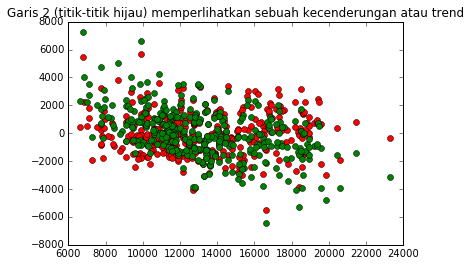

In [24]:
error1 = w.Edyn - a1 * w.Estat - b1
error2 = w.Edyn - 1/a2 * w.Estat + b2/a2
print('nilai rata-rata galat/error Garis 1: ',mean(error1))
print('nilai rata-rata galat/error Garis 2: ',mean(error2))
print('nilai akar kuadrat galat/error Garis 1: ',sqrt(mean(error1**2)))
print('nilai akar kuadrat galat/error Garis 2: ',sqrt(mean(error2**2)))
#
plot(w.Estat,error1,'ro')
plot(w.Estat,error2,'go')
title('Garis 2 (titik-titik hijau) memperlihatkan sebuah kecenderungan atau trend')

### Pencocokan kurva (*curve fitting*)
Akan ditambahkan